<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by Leonardo Cotta*

---

# Análise dos Dados do Airbnb - *Buenos Aires*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Buenos Aires / Argentina, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


Importando as biblioteca que serão utilizadas para realizar a analise dos dados.

In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# testando a função matplotlib
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


*Dados utilizados foram adquiridos diretamento no site da AIRBNB*

Link para acesso a origen dos dados [Inside AIRBNB](http://insideairbnb.com/get-the-data.html)

Nome do Arquivo **listings.csv** 

Utilizando a versão "resumida" dos dados presentes no arquivo (linstings.csv.gz) para analise exploratoria.

In [0]:
# importando o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/argentina/ciudad-aut%C3%B3noma-de-buenos-aires/buenos-aires/2020-04-26/visualisations/listings.csv")

## Análise dos Dados


Criando um dicionário para falicitar o entendimento dos dados presentes em cada coluna do DataFrame.

**Dicionário das variáveis**

*  *id* - Número de id gerado para identificar o imóvel
*  *name* - Nome da propriedade anunciada
* *host_id* -  Número de id do proprietário (anfitrião) da propriedade
* *host_name* - Nome do anfitrião
* *neigthbourdhood_group* - Esta não contém nenhum valor válido
* *neighbourhood* - Nome do bairro
* *latitude* - Coordenada da latitude da propriedade
* *longitude* - Coordenada da longitude da propriedade
* *room_type* - Informa o tipo de quarto que é oferecido
* *price* - Preço para alugar o imovel
* *minimum_ninghts* - Quantidade mínima de noites para reservar
* *number_of_reviews* - Número de reviews que a propriedade possui
* *last_review* - Data do último review
* *reviews_per_month* - Quantidade de reviews por mês
* *calculated_host_listings_count* - Quantidade de imóveis do mesmo anfitrião
* *availability_365* - Número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *DataFrame*, analisando as 5 primeiras linhas.

In [0]:
# mostrando as 5 linhas do DataFrame
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,NaN,Palermo,-34.58184,-58.42415,Entire home/apt,3983,2,26,2019-11-28,0.27,1,365
1,12463,Room in Recoleta - awesome location,48799,Matt,NaN,Recoleta,-34.59761,-58.39468,Private room,1593,1,20,2017-12-11,0.16,1,365
2,13095,Standard Room at Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59382,-58.42994,Private room,2987,1,1,2018-12-18,0.06,7,365
3,13096,Standard Room in Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59398,-58.42853,Private room,2987,1,0,NaN,NaN,7,365
4,13097,Standard Room at Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59348,-58.42949,Private room,2987,1,66,2019-11-27,1.89,7,365


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

O DataFrame Possui:

* 23729 Linhas
* 16 Colunas

Os tipos de dados presentes são:

* 7 do tipos inteiro
* 5 do tipos texto
* 4 do tipos decimal


In [0]:
# exibir a quantidade de linhas e colunas que o DataFrame possui
print('O DataFrame Possui: ')
print("Linhas: \t {}".format(df.shape[0]))
print("Colunas: \t {}\n".format(df.shape[1]))
# exibindo as colunas e o tipo de dado que cada uma possui
print('Nome da Coluna      \t     tipo de dado')
display(df.dtypes)

O DataFrame Possui: 
Linhas: 	 23729
Colunas: 	 16

Nome da Coluna      	     tipo de dado


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

O DataFrame possui colunas com valores ausentes ou nulos:

* A coluna **neighbourhood** possui **100%** dos seus valores ausentes ou nulos
* As Colunas **reviews_per_month** e **last_review** possuem aproximadamente **27,50%** dos seus valores ausente ou nulos
* As colunas **name** e **host_name** possuem menos de **0,0005%** aproximadamente dos seus valores ausentes ou nulos

In [0]:
# ordenando em ordem decrescente as colunas por seus valores ausentes
print('Colunas          \t       Porcentagem')
(df.isnull().sum()/ df.shape[0]).sort_values(ascending=False)
# dicionario: 1.000000 corresponde a 100%

Colunas          	       Porcentagem


neighbourhood_group               1.000000
reviews_per_month                 0.274221
last_review                       0.274221
name                              0.000421
host_name                         0.000126
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Gerando um histograma das colunas presentes no DataFrame para análise de suas variáveis.

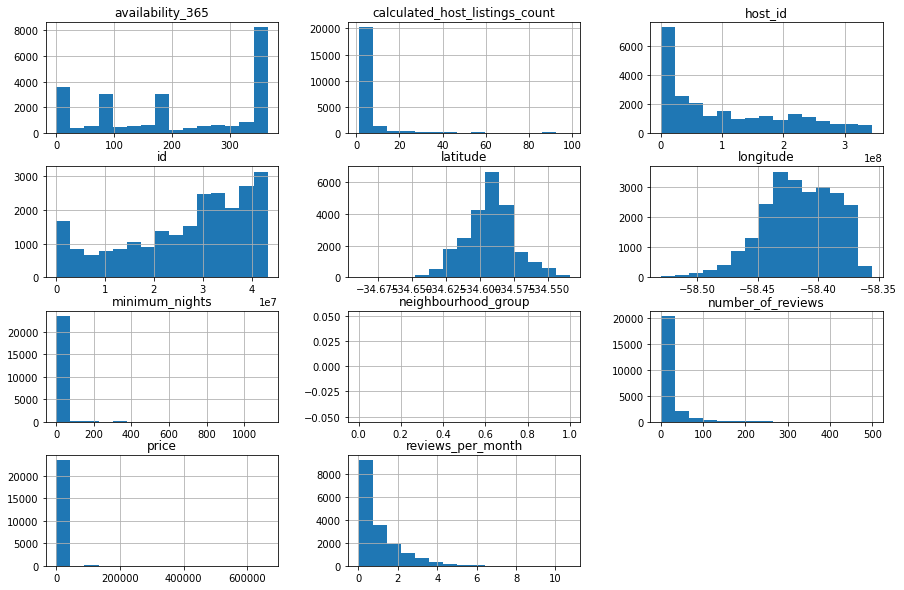

In [0]:
# plotando o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

A valor medio dos preços de aluguel e **$4.014,875595 Pesos argentino**.

In [0]:
# ver a média da coluna `price`
df[['price']].describe()

,price
count,23729.000000
mean,4014.875595
std,16075.326378
min,0.000000
25%,1394.000000
50%,2124.000000
75%,3319.000000
max,663732.000000


### **Q4. Qual a correlação existente entre as variáveis**

Gerando e exibindo um matriz de correlação entre as colunas.

In [0]:
# gerando a matriz de correlação
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                 'calculated_host_listings_count', 'availability_365']].corr()
# exibindo a matriz de correlação
display(corr)
# dicionario 1.000000 corresponde a 100%

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.009647,-0.029104,-0.011848,0.046812,0.041431
minimum_nights,0.009647,1.000000,-0.048718,-0.055924,0.002630,0.023469
number_of_reviews,-0.029104,-0.048718,1.000000,0.627237,-0.055690,0.073594
reviews_per_month,-0.011848,-0.055924,0.627237,1.000000,-0.085936,-0.020894
calculated_host_listings_count,0.046812,0.002630,-0.055690,-0.085936,1.000000,0.101757
availability_365,0.041431,0.023469,0.073594,-0.020894,0.101757,1.000000


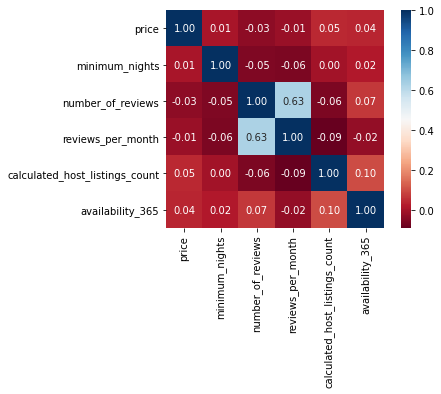

In [0]:
# plotando um heatmap a partir da matriz de correlação
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

O tipo de imóvel mais alugado e o **Entire home/apt** que possui uma quantidade aproximada de 77% dos imoveis disponiveis.

In [0]:
# mostrando a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    18359
Private room        4533
Shared room          549
Hotel room           288
Name: room_type, dtype: int64

In [0]:
# mostrando a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts() / df.shape[0]
# dicionario 1.000000 corresponde a 100%

Entire home/apt    0.773695
Private room       0.191032
Shared room        0.023136
Hotel room         0.012137
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



A região considerada a mais cara e a **Villa Gral. Mitre**.

In [0]:
# ver preços por bairros, na média
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Villa Gral. Mitre    12918.558824
Puerto Madero         6940.823308
Villa Santa Rita      6112.000000
Monserrat             5891.149105
Retiro                5237.338424
Villa Luro            5133.238095
Chacarita             4933.101695
Monte Castro          4899.954545
Constitucion          4812.080745
San Nicolas           4499.326797
Name: price, dtype: float64

Exibindo a concentração dos imoveis por área utilizando as suas coordenadas.

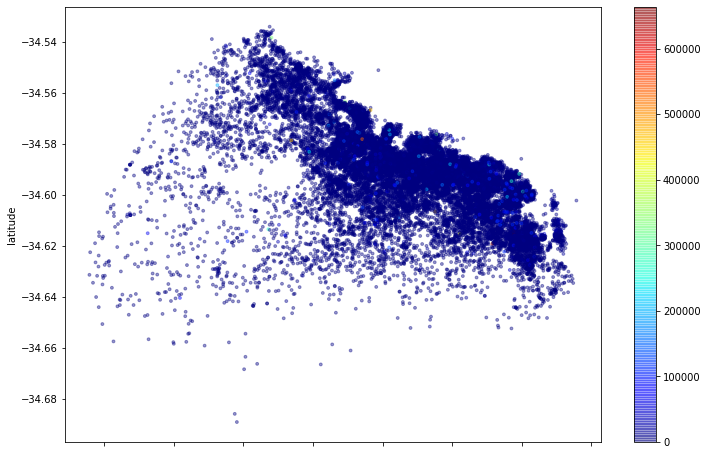

In [0]:
# plotando os imóveis pela latitude-longitude
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8,
        cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

A media de noites para aluguel é **6.027...** dias.

In [0]:
# exibindo a média da coluna `minimum_nights``
print('Media')
df.minimum_nights.mean()

Media


6.027519069493025

## Conclusões


Conclui se que mesmo utilizando a base de dados resumida e pronta para analise ela possui muitas informações com caracteristicas de outlier, como um local que possui um quantidade com poucos imoveis, uma quantidade de noites de aluguel minima muito alta, valores de aluguel muito altos, ocasionando com isto a nescessidade da limpeza e ajustes nos dados presentes no DataFrame para aumentar a precisão e qualidade na análise das informações disponibilizadas.